# ***Food Demand Forecasting***

* **import Neccessory libraries**

In [ ]:
#import Neccessory libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import StandardScaler


from sklearn.model_selection import train_test_split, GridSearchCV

#import required accuracy metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import KFold, cross_val_score

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


* **Import Dataset**

In [ ]:
full = pd.read_csv('/content/fulfilment_center_info.csv')
full.head(5)

,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7
2,124,590,56,TYPE_C,4.0
3,66,648,34,TYPE_A,4.1
4,94,632,34,TYPE_C,3.6


In [ ]:
meal = pd.read_csv('/content/meal_info.csv')
meal.head(5)

,meal_id,category,cuisine
0,1885,Beverages,Thai
1,1993,Beverages,Thai
2,2539,Beverages,Thai
3,1248,Beverages,Indian
4,2631,Beverages,Indian


In [ ]:
train = pd.read_csv('/content/train.csv')
train.head(5)

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40


In [ ]:
ss = pd.read_csv('/content/sample_submission_hSlSoT6.csv')
ss.head(5)

,id,num_orders
0,1028232,0
1,1127204,0
2,1212707,0
3,1082698,0
4,1400926,0


In [ ]:
#merging all train dataset files using inner(similar column)
tdf = pd.merge(train,meal, on=['meal_id'], how='inner')
df = pd.merge(tdf,full, on =['center_id'], how='inner')
df.head(6)

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area
0,1379560,1,55,1885,136.83,152.29,0,0,177,Beverages,Thai,647,56,TYPE_C,2.0
1,1018704,2,55,1885,135.83,152.29,0,0,323,Beverages,Thai,647,56,TYPE_C,2.0
2,1196273,3,55,1885,132.92,133.92,0,0,96,Beverages,Thai,647,56,TYPE_C,2.0
3,1116527,4,55,1885,135.86,134.86,0,0,163,Beverages,Thai,647,56,TYPE_C,2.0
4,1343872,5,55,1885,146.50,147.50,0,0,215,Beverages,Thai,647,56,TYPE_C,2.0
5,1493612,6,55,1885,146.53,146.53,0,0,285,Beverages,Thai,647,56,TYPE_C,2.0


In [ ]:
#import test dataset
tt = pd.read_csv('/content/test_QoiMO9B.csv')
tt.head(5)

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured
0,1028232,146,55,1885,158.11,159.11,0,0
1,1127204,146,55,1993,160.11,159.11,0,0
2,1212707,146,55,2539,157.14,159.14,0,0
3,1082698,146,55,2631,162.02,162.02,0,0
4,1400926,146,55,1248,163.93,163.93,0,0


In [ ]:
# Find the shape of the test data set
print("shape of the test data set", tt.shape)

shape of the test data set (32573, 8)


In [ ]:
# Find the shape of the test data set
print("shape of the train data set", df.shape)


shape of the train data set (456548, 15)


In [ ]:
#lets check for Null Values
df.isnull().sum()

id                       0
week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
num_orders               0
category                 0
cuisine                  0
city_code                0
region_code              0
center_type              0
op_area                  0
dtype: int64

* there is no null values in any columns

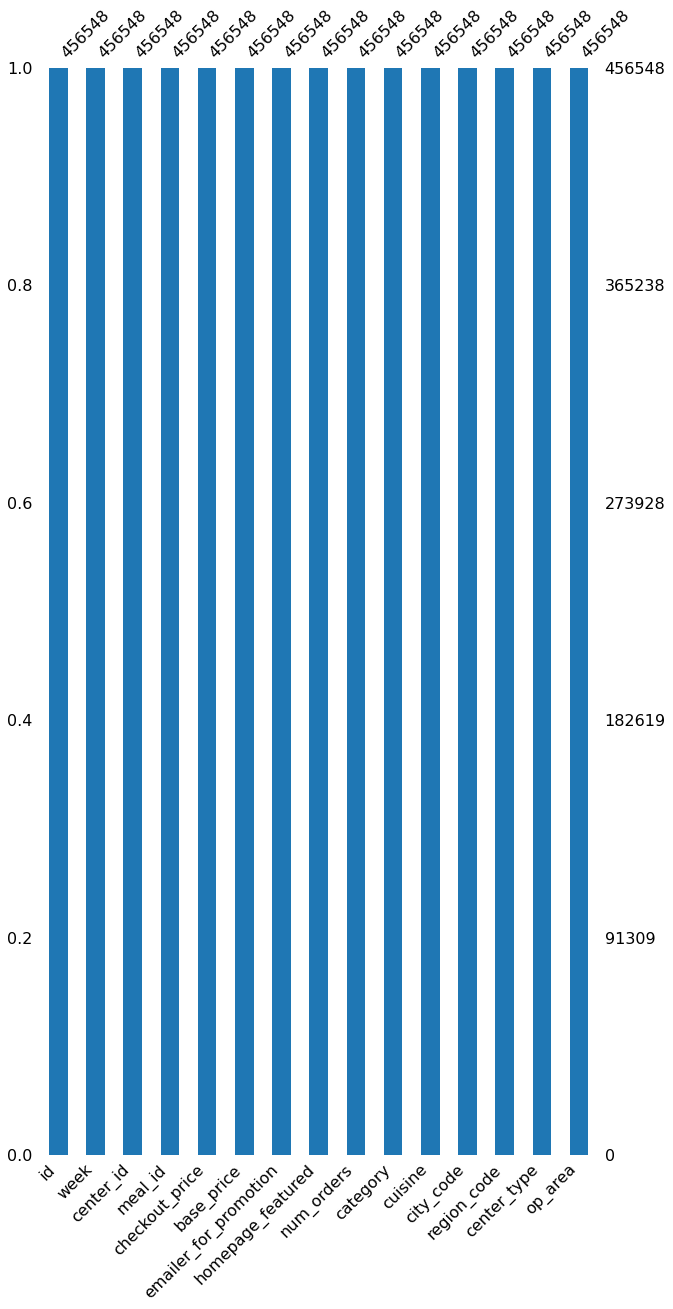

In [ ]:
#checking null values using graphical representation

import missingno
missingno.bar(df, figsize = (10,20), color="tab:blue")

In [ ]:
#check the data types
df.dtypes

id                         int64
week                       int64
center_id                  int64
meal_id                    int64
checkout_price           float64
base_price               float64
emailer_for_promotion      int64
homepage_featured          int64
num_orders                 int64
category                  object
cuisine                   object
city_code                  int64
region_code                int64
center_type               object
op_area                  float64
dtype: object

In [ ]:

#Lets check which columns contains '?'

df[df.columns[(df == '?').any()]].nunique()

Series([], dtype: float64)

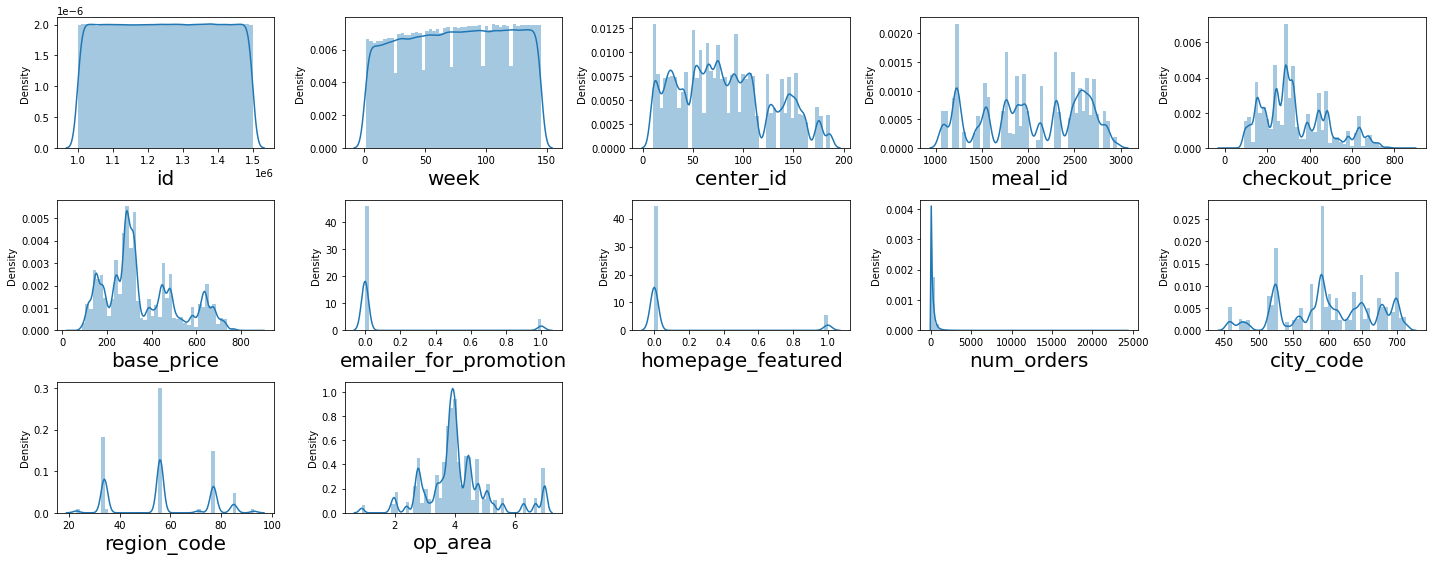

In [ ]:

#lets check distribution for continuous columns
num_data = df._get_numeric_data()
plt.figure(figsize = (20,20))
plotnumber = 1
for column in num_data:
    if plotnumber <=15:
        ax = plt.subplot(8,5,plotnumber)
        sns.distplot(num_data[column])
        plt.xlabel(column,fontsize = 20)
    plotnumber+=1
plt.tight_layout()

In [ ]:
df.columns

Index(['id', 'week', 'center_id', 'meal_id', 'checkout_price', 'base_price',
       'emailer_for_promotion', 'homepage_featured', 'num_orders', 'category',
       'cuisine', 'city_code', 'region_code', 'center_type', 'op_area'],
      dtype='object')

In [ ]:
# lets check the unique values in all columns in train data set

for col in num_data.columns:
    print(col,df[col].nunique())
    print('-'*30)

id 456548
------------------------------
week 145
------------------------------
center_id 77
------------------------------
meal_id 51
------------------------------
checkout_price 1992
------------------------------
base_price 1907
------------------------------
emailer_for_promotion 2
------------------------------
homepage_featured 2
------------------------------
num_orders 1250
------------------------------
city_code 51
------------------------------
region_code 8
------------------------------
op_area 30
------------------------------


In [ ]:
#Lets chcek the value counts for categorical data

for i in df.columns:
    if df[i].dtypes == 'object':
        print(df[i].value_counts())
        print('-----------------------------------')

Beverages       127890
Rice Bowl        33408
Sandwich         33291
Pizza            33138
Starters         29941
Other Snacks     29379
Desert           29294
Salad            28559
Pasta            27694
Seafood          26916
Biryani          20614
Extras           13562
Soup             12675
Fish             10187
Name: category, dtype: int64
-----------------------------------
Italian        122925
Thai           118216
Indian         112612
Continental    102795
Name: cuisine, dtype: int64
-----------------------------------
TYPE_A    262881
TYPE_C     99593
TYPE_B     94074
Name: center_type, dtype: int64
-----------------------------------


# ***Heat Map for checking the correlation***

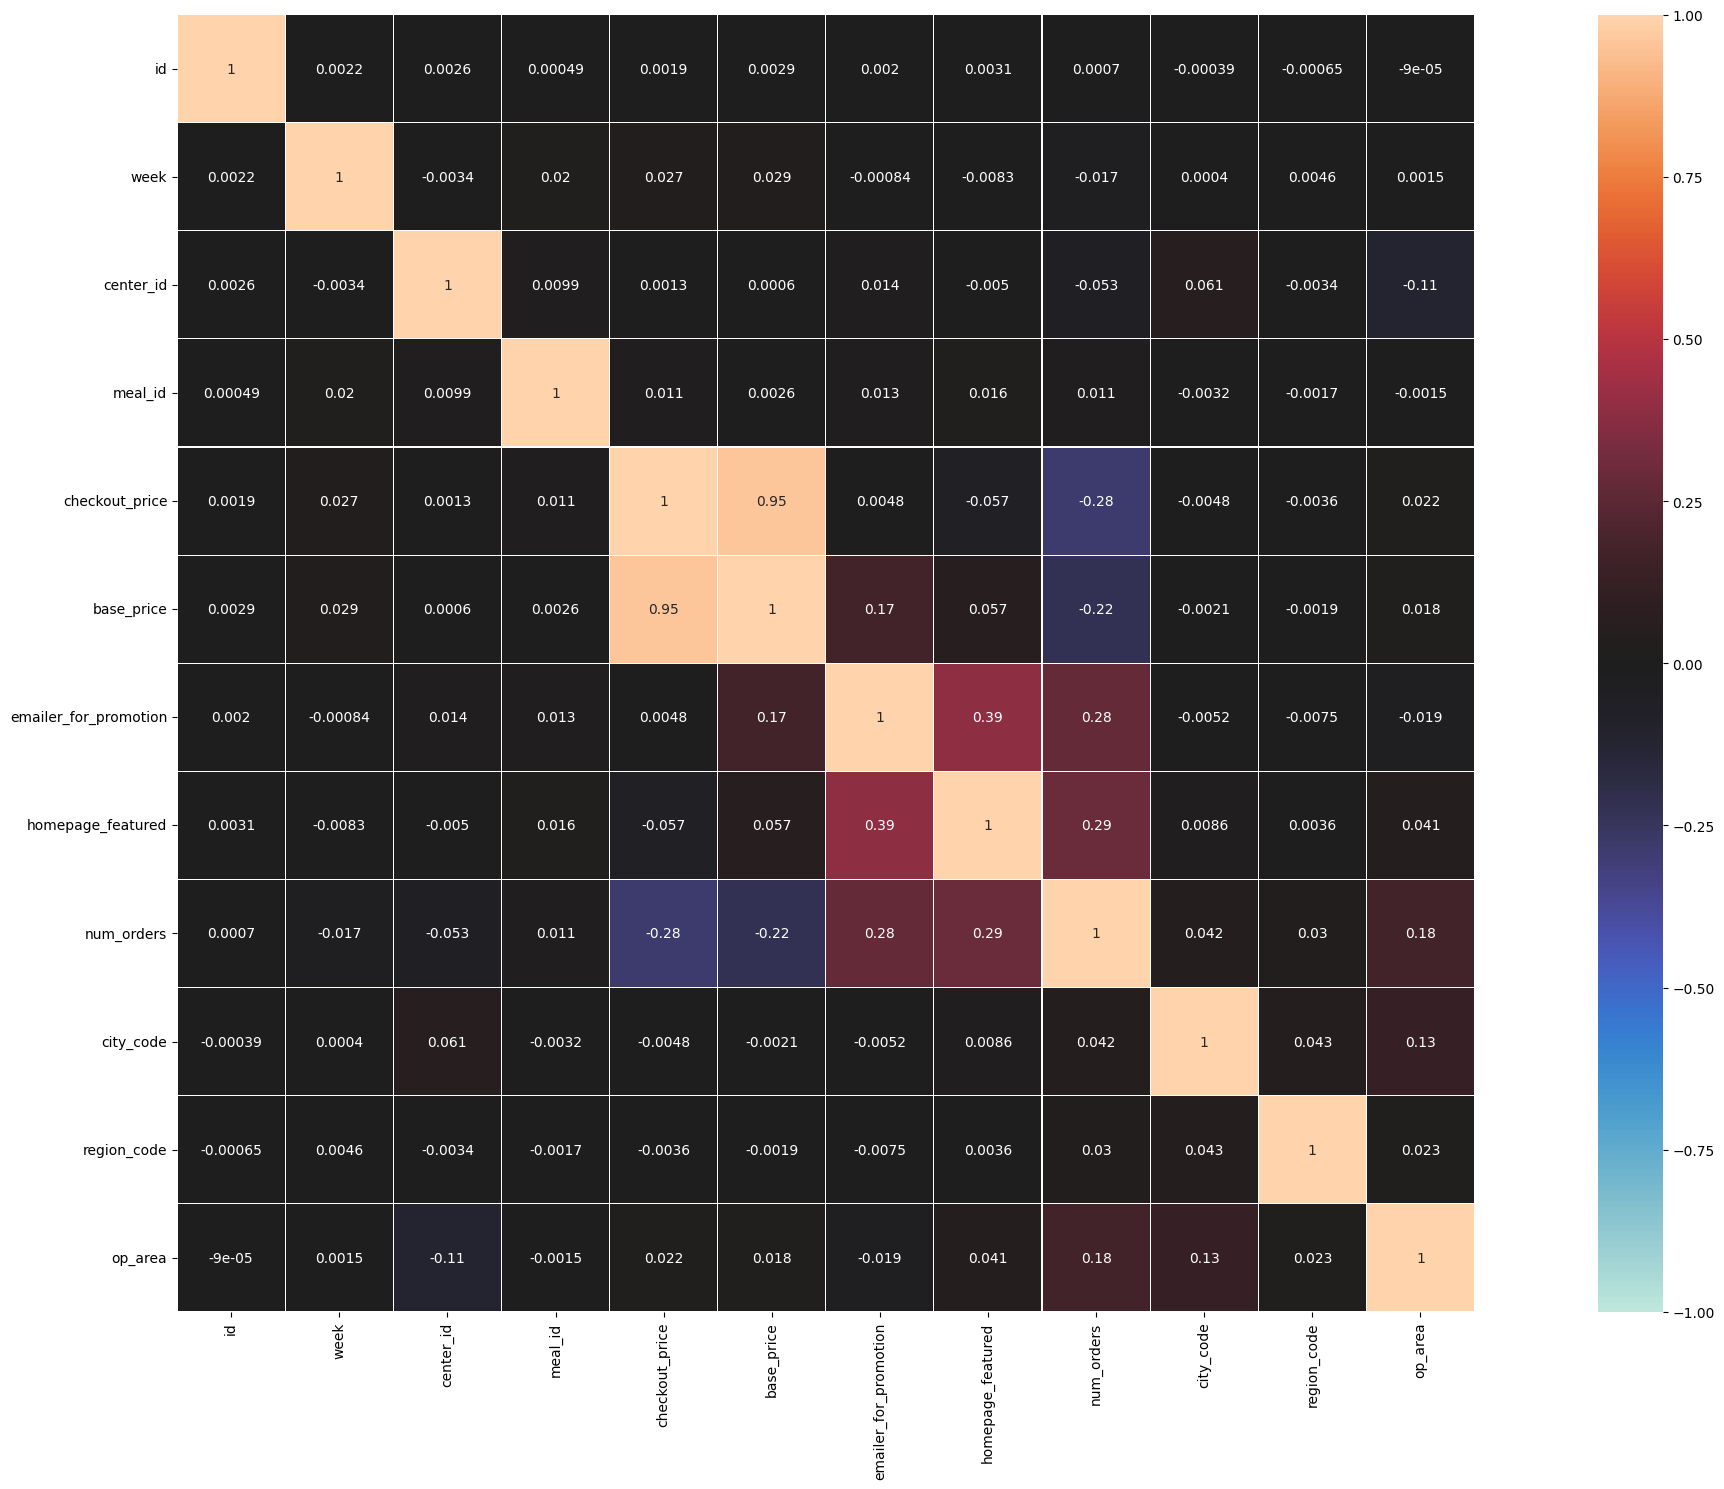

In [ ]:
plt.style.use('default')
df_corr = df.corr()
plt.figure(figsize = (25,15))
sns.heatmap(df_corr,vmin=-1,vmax=1,annot=True,square=True,center=0,fmt='.2g',linewidths=0.1)
plt.tight_layout()

* Looking at the above heat map we can say that many features are in good correlation with our target variable and also many features are having very poor relation with the target variable.
*  The columns derived home page featured, emailer for promotion and op area have Positive relation.
* The columns derived checkout price and base price have negative relation.

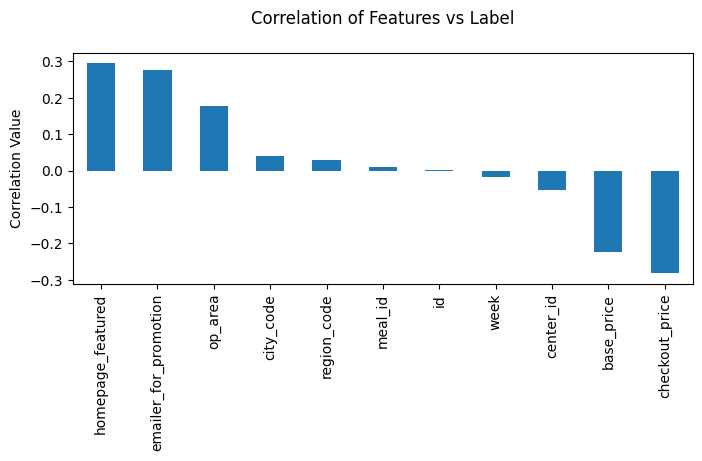

In [ ]:
# find corelation between only target columns 

df_corr = df.corr()
plt.figure(figsize=(8,3))
df_corr['num_orders'].sort_values( ascending = False).drop('num_orders').plot.bar()
plt.title("Correlation of Features vs Label\n")
plt.ylabel("Correlation Value")
plt.show()

* The columns derived home page featured, emailer for promotion and op area have Positive relation.

* The columns derived checkout price and base price have negative relation.

# ***EDA***

In [ ]:
df.columns

Index(['id', 'week', 'center_id', 'meal_id', 'checkout_price', 'base_price',
       'emailer_for_promotion', 'homepage_featured', 'num_orders', 'category',
       'cuisine', 'city_code', 'region_code', 'center_type', 'op_area'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 456548 entries, 0 to 456547
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     456548 non-null  int64  
 1   week                   456548 non-null  int64  
 2   center_id              456548 non-null  int64  
 3   meal_id                456548 non-null  int64  
 4   checkout_price         456548 non-null  float64
 5   base_price             456548 non-null  float64
 6   emailer_for_promotion  456548 non-null  int64  
 7   homepage_featured      456548 non-null  int64  
 8   num_orders             456548 non-null  int64  
 9   category               456548 non-null  object 
 10  cuisine                456548 non-null  object 
 11  city_code              456548 non-null  int64  
 12  region_code            456548 non-null  int64  
 13  center_type            456548 non-null  object 
 14  op_area                456548 non-nu

In [ ]:
for col in num_data.columns:
    print(col,df[col].nunique())
    print('-'*30)

id 456548
------------------------------
week 145
------------------------------
center_id 77
------------------------------
meal_id 51
------------------------------
checkout_price 1992
------------------------------
base_price 1907
------------------------------
emailer_for_promotion 2
------------------------------
homepage_featured 2
------------------------------
num_orders 1250
------------------------------
city_code 51
------------------------------
region_code 8
------------------------------
op_area 30
------------------------------


In [ ]:

col=['homepage_featured','emailer_for_promotion','op_area']

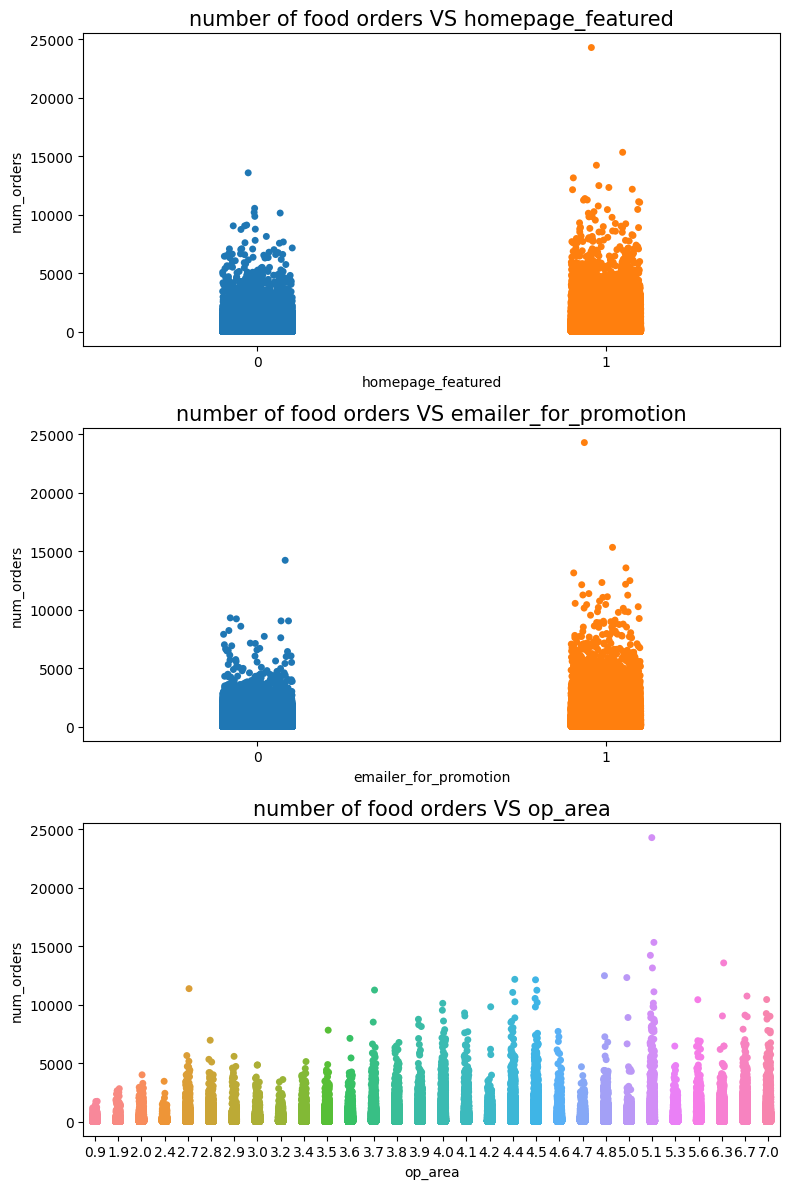

In [ ]:
plt.style.use('default')
plt.figure(figsize=(8,12))
for i in range(len(col)):
    plt.subplot(3,1,i+1)
    sns.stripplot(y=df['num_orders'],x=df[col[i]])
    plt.title(f"number of food orders VS {col[i]}",fontsize=15)
    plt.xticks(fontsize=10)  
    plt.yticks(fontsize=10)
    plt.tight_layout()

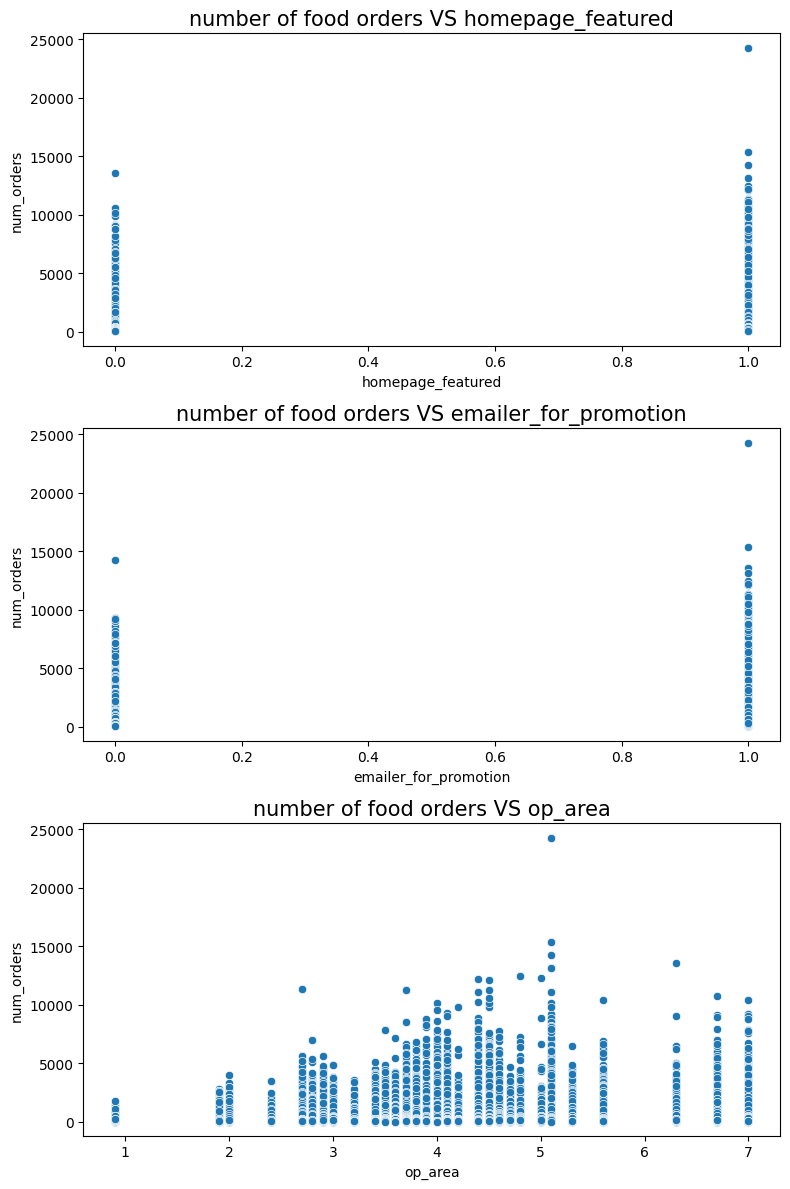

In [ ]:
plt.style.use('default')
plt.figure(figsize=(8,12))
for i in range(len(col)):
    plt.subplot(3,1,i+1)
    sns.scatterplot(y=df['num_orders'],x=df[col[i]])
    plt.title(f"number of food orders VS {col[i]}",fontsize=15)
    plt.xticks(fontsize=10)  
    plt.yticks(fontsize=10)
    plt.tight_layout()

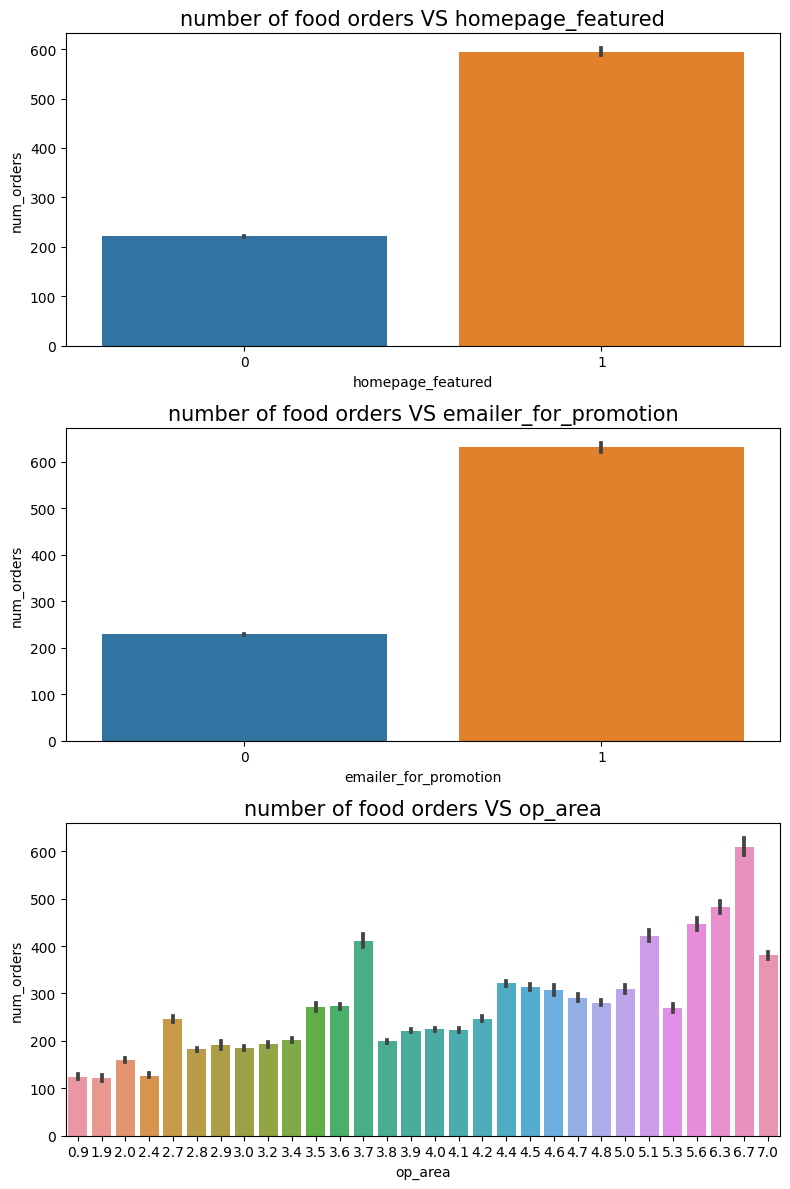

In [ ]:
plt.style.use('default')
plt.figure(figsize=(8,12))
for i in range(len(col)):
    plt.subplot(3,1,i+1)
    sns.barplot(y=df['num_orders'],x=df[col[i]])
    plt.title(f"number of food orders VS {col[i]}",fontsize=15)
    plt.xticks(fontsize=10)  
    plt.yticks(fontsize=10)
    plt.tight_layout()

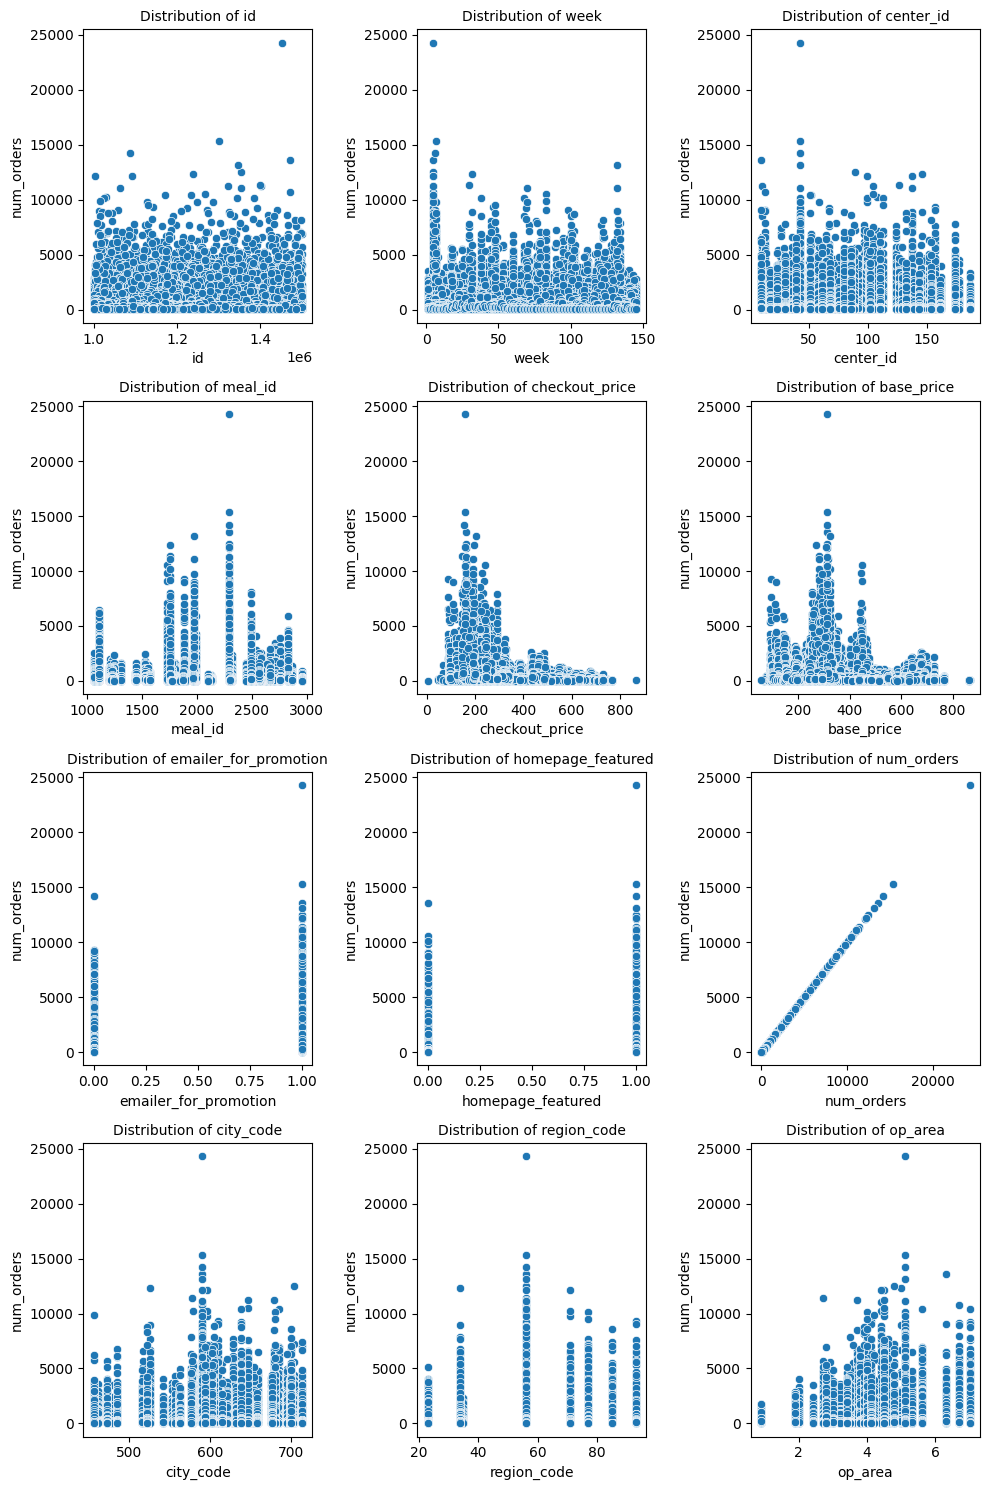

In [ ]:
#Lets have a look on distribution of our data
num_data = df._get_numeric_data()
plt.style.use('default')
plt.figure(figsize = (10,15))
plotnumber = 1
for column in num_data:
    if plotnumber <=12:
        ax = plt.subplot(4,3,plotnumber)
        sns.scatterplot(num_data[column],y=df['num_orders'])
        plt.title(f"Distribution of {column}",fontsize=10)
        plt.xlabel(column,fontsize = 10)
    plotnumber+=1
plt.tight_layout()

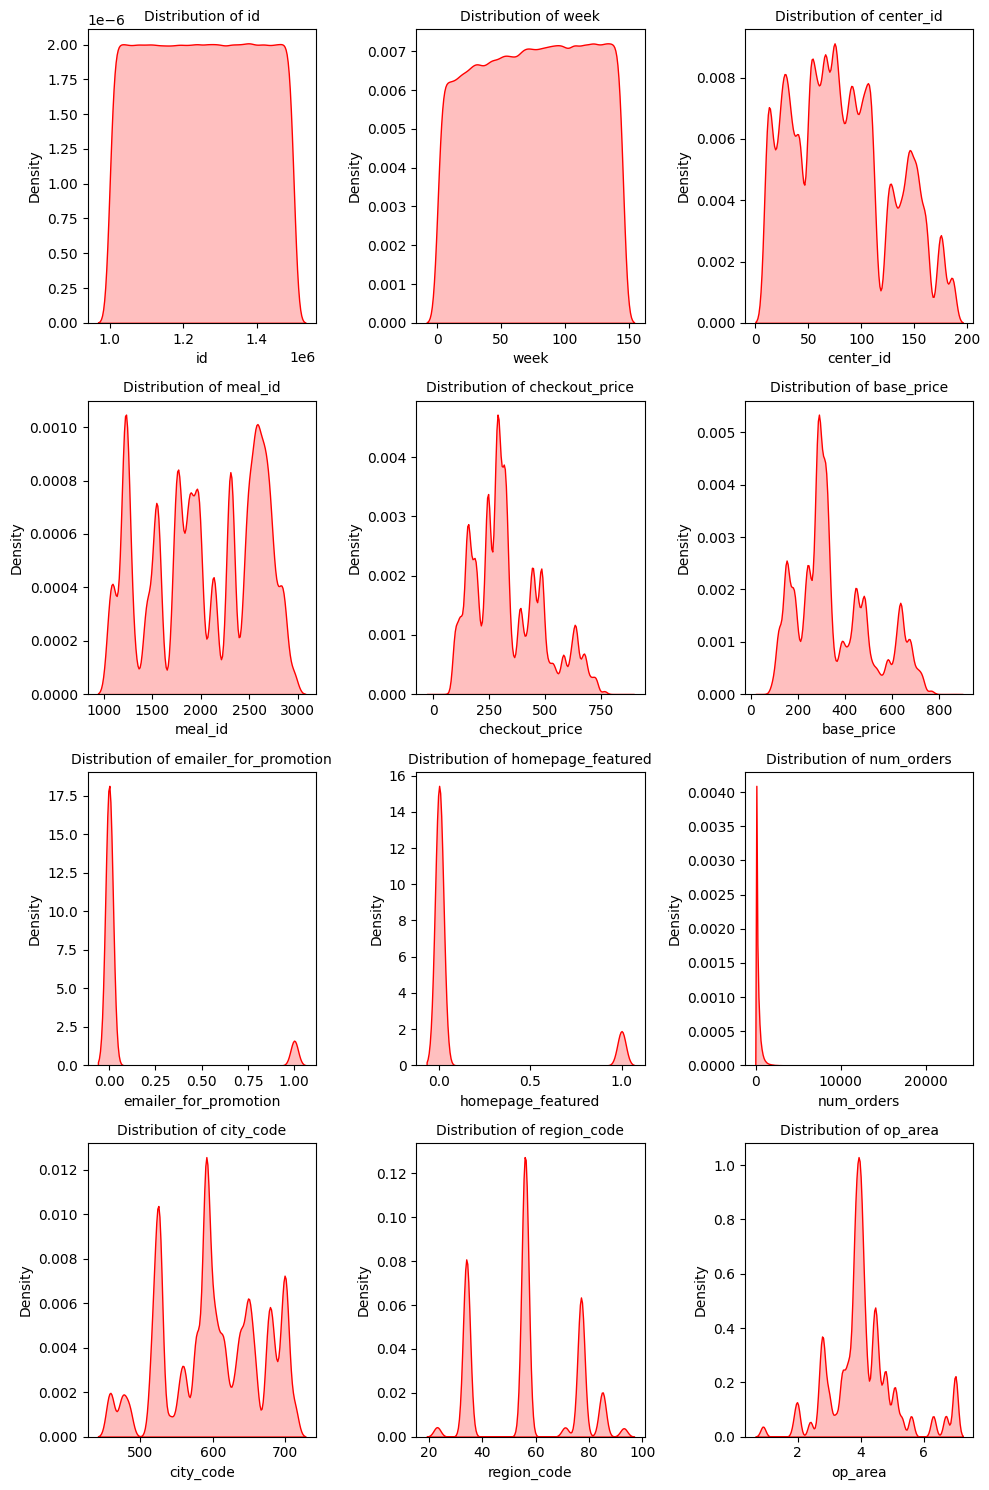

In [ ]:

#Lets have a look on distribution of our data
num_data = df._get_numeric_data()
plt.style.use('default')
plt.figure(figsize = (10,15))
plotnumber = 1
for column in num_data:
    if plotnumber <=12:
        ax = plt.subplot(4,3,plotnumber)
        sns.distplot(num_data[column],hist=False, color="red", kde_kws={"shade": True})
        plt.title(f"Distribution of {column}",fontsize=10)
        plt.xlabel(column,fontsize = 10)
    plotnumber+=1
plt.tight_layout()

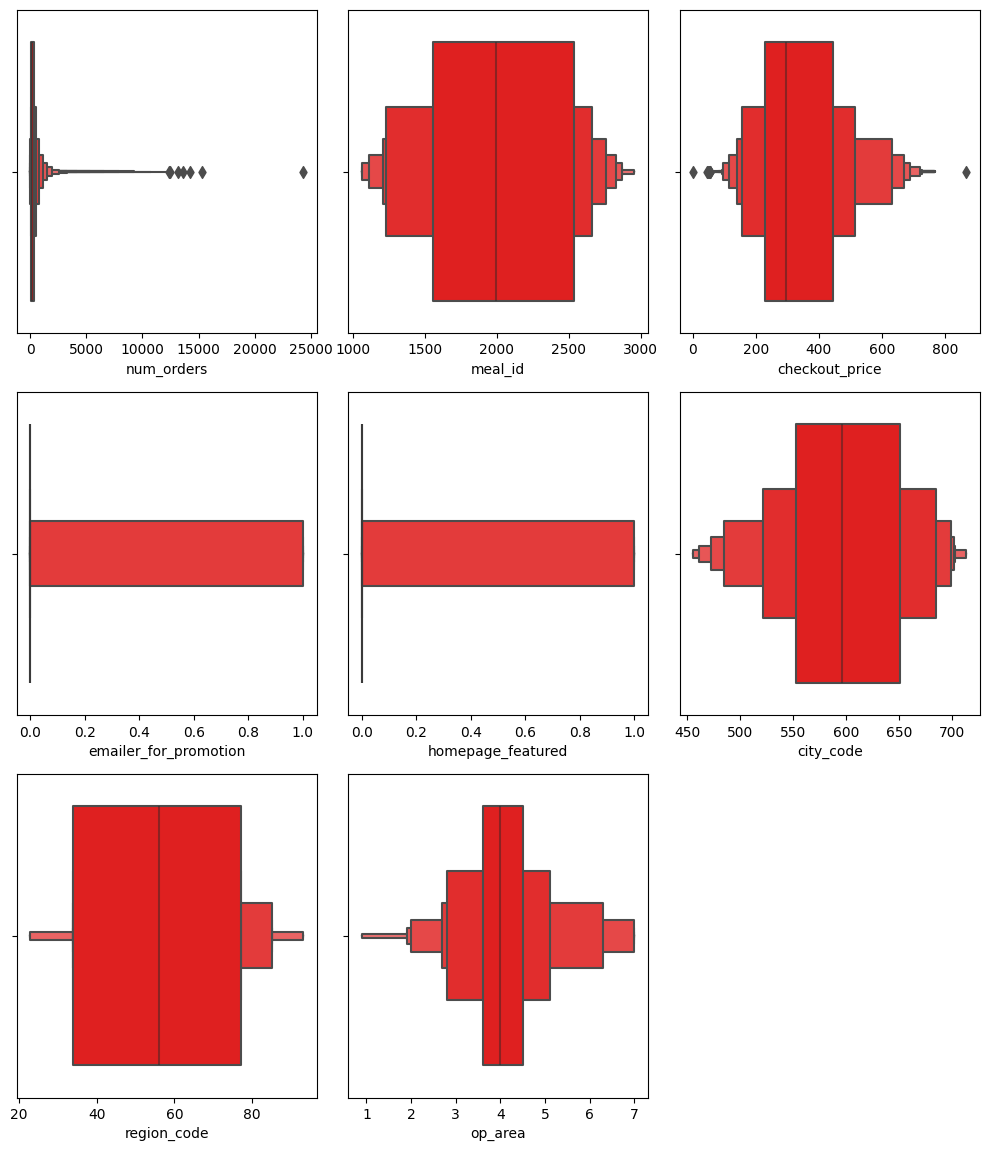

In [ ]:
#Lets have a look on distribution of our data
cols=['num_orders','meal_id','checkout_price','emailer_for_promotion','homepage_featured','city_code','region_code','op_area']
plt.style.use('default')
plt.figure(figsize = (10,15))
plotnumber = 1
for column in cols:
    if plotnumber <=15:
        ax = plt.subplot(4,3,plotnumber)
        sns.boxenplot(df[column], color="red")
        #plt.title(f"Distribution of {column}",fontsize=10)
        plt.xlabel(column,fontsize = 10)
    plotnumber+=1
plt.tight_layout()

# ***Now remove these outliers and generate new dataframe***

In [ ]:
column = ['num_orders']
for col in df.columns:
    if df[col].dtypes != 'object':
      percentile = df[col].quantile([0.01,0.98]).values
      df[col][df[col]<=percentile[0]]=percentile[0]
      df[col][df[col]>=percentile[1]]=percentile[1]

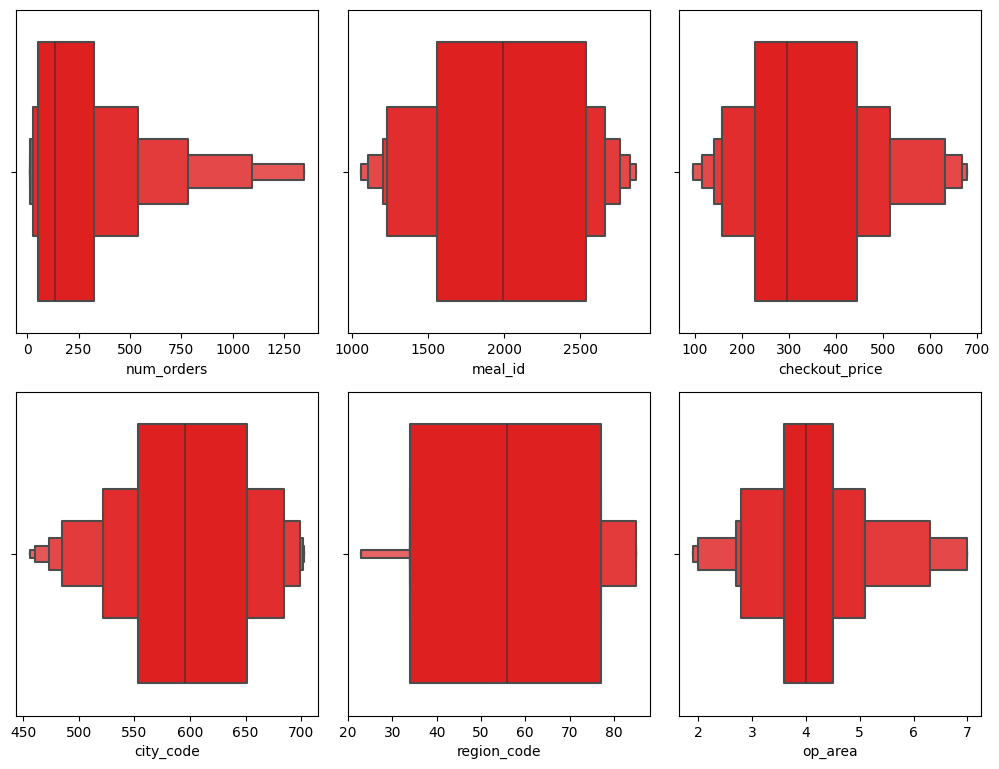

In [ ]:
#Lets have a look on distribution of our data
cols=['num_orders','meal_id','checkout_price','city_code','region_code','op_area']
plt.style.use('default')
plt.figure(figsize = (10,15))
plotnumber = 1
for column in cols:
    if plotnumber <=15:
        ax = plt.subplot(4,3,plotnumber)
        sns.boxenplot(df[column], color="red")
        #plt.title(f"Distribution of {column}",fontsize=10)
        plt.xlabel(column,fontsize = 10)
    plotnumber+=1
plt.tight_layout()

# ***Data processing***

In [ ]:

df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,456548.0,1.250021e+06,144143.171322,1004998.47,1124998.75,1250183.50,1375140.25,1489991.06
week,456548.0,7.475362e+01,41.477795,2.00,39.00,76.00,111.00,143.00
center_id,456548.0,8.199682e+01,45.738716,10.00,43.00,76.00,110.00,177.00
meal_id,456548.0,2.023690e+03,546.370970,1062.00,1558.00,1993.00,2539.00,2867.00
checkout_price,456548.0,3.316510e+02,151.396161,96.03,228.95,296.82,445.23,680.03
base_price,456548.0,3.538320e+02,159.505507,115.43,243.50,310.46,458.87,699.43
emailer_for_promotion,456548.0,8.115247e-02,0.273069,0.00,0.00,0.00,0.00,1.00
homepage_featured,456548.0,1.091999e-01,0.311890,0.00,0.00,0.00,0.00,1.00
num_orders,456548.0,2.456621e+02,286.660645,13.00,54.00,136.00,324.00,1349.00
city_code,456548.0,6.014033e+02,65.953925,456.00,553.00,596.00,651.00,703.00


# **Get Dummies**

In [ ]:

df= pd.get_dummies(df, columns=['emailer_for_promotion','homepage_featured'],drop_first=True)

In [ ]:
df.head(4)

,id,week,center_id,meal_id,checkout_price,base_price,num_orders,category,cuisine,city_code,region_code,center_type,op_area,emailer_for_promotion_1,homepage_featured_1
0,1379560.0,2,55,1885,136.83,152.29,177,Beverages,Thai,647,56,TYPE_C,2.0,0,0
1,1018704.0,2,55,1885,135.83,152.29,323,Beverages,Thai,647,56,TYPE_C,2.0,0,0
2,1196273.0,3,55,1885,132.92,133.92,96,Beverages,Thai,647,56,TYPE_C,2.0,0,0
3,1116527.0,4,55,1885,135.86,134.86,163,Beverages,Thai,647,56,TYPE_C,2.0,0,0


In [ ]:
display(df.drop_duplicates())

,id,week,center_id,meal_id,checkout_price,base_price,num_orders,category,cuisine,city_code,region_code,center_type,op_area,emailer_for_promotion_1,homepage_featured_1
0,1379560.0,2,55,1885,136.83,152.29,177,Beverages,Thai,647,56,TYPE_C,2.0,0,0
1,1018704.0,2,55,1885,135.83,152.29,323,Beverages,Thai,647,56,TYPE_C,2.0,0,0
2,1196273.0,3,55,1885,132.92,133.92,96,Beverages,Thai,647,56,TYPE_C,2.0,0,0
3,1116527.0,4,55,1885,135.86,134.86,163,Beverages,Thai,647,56,TYPE_C,2.0,0,0
4,1343872.0,5,55,1885,146.50,147.50,215,Beverages,Thai,647,56,TYPE_C,2.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456543,1437396.0,141,61,2104,583.03,630.53,13,Fish,Continental,473,77,TYPE_A,4.5,0,1
456544,1060716.0,142,61,2104,581.03,582.03,42,Fish,Continental,473,77,TYPE_A,4.5,0,0
456545,1029231.0,143,61,2104,583.03,581.03,40,Fish,Continental,473,77,TYPE_A,4.5,0,0
456546,1141147.0,143,61,2104,582.03,581.03,53,Fish,Continental,473,77,TYPE_A,4.5,0,0


# ***Split Data into x & y***

In [ ]:
#lets saperate data into label and features
x = df.drop(columns = 'num_orders')
y = df["num_orders"]

In [ ]:
x.skew()

id                        -0.003950
week                      -0.051467
center_id                  0.323879
meal_id                   -0.179705
checkout_price             0.632411
base_price                 0.620087
city_code                 -0.222412
region_code                0.015690
op_area                    0.811654
emailer_for_promotion_1    3.067713
homepage_featured_1        2.506022
dtype: float64

In [ ]:

#Lets treat the skewness
for index in x.skew().index:
    if x.skew().loc[index]>0.5:
        x[index]=np.log1p(x[index])
        if x.skew().loc[index]<-0.5:
            x[index]=np.square(x[index])

In [ ]:
x.skew()

id                        -0.003950
week                      -0.051467
center_id                  0.323879
meal_id                   -0.179705
checkout_price            -0.285006
base_price                -0.197094
city_code                 -0.222412
region_code                0.015690
op_area                   -0.035206
emailer_for_promotion_1         NaN
homepage_featured_1             NaN
dtype: float64

In [ ]:

num_data = x.select_dtypes(include = [np.number])
cat_data = x.select_dtypes(exclude=[np.number])

In [ ]:
num_data.head(3)

,id,week,center_id,meal_id,checkout_price,base_price,city_code,region_code,op_area,emailer_for_promotion_1,homepage_featured_1
0,1379560.0,2,55,1885,4.926021,5.032332,647,56,1.098612,0.0,0.0
1,1018704.0,2,55,1885,4.918739,5.032332,647,56,1.098612,0.0,0.0
2,1196273.0,3,55,1885,4.897243,4.904682,647,56,1.098612,0.0,0.0


In [ ]:
cat_data.head(3)

,category,cuisine,center_type
0,Beverages,Thai,TYPE_C
1,Beverages,Thai,TYPE_C
2,Beverages,Thai,TYPE_C


# **Applying standard scaler to numerical data**

In [ ]:
#Lets bring all numerical features to common scale by applying standard scaler
scaler = StandardScaler()
num = scaler.fit_transform(num_data)
num = pd.DataFrame(num,columns=num_data.columns)

In [ ]:
num.head(5)

,id,week,center_id,meal_id,checkout_price,base_price,city_code,region_code,op_area,emailer_for_promotion_1,homepage_featured_1
0,0.898682,-1.754040,-0.590241,-0.25384,-1.613767,-1.576185,0.691343,-0.029464,-2.447751,-0.297187,-0.350123
1,-1.604776,-1.754040,-0.590241,-0.25384,-1.628977,-1.576185,0.691343,-0.029464,-2.447751,-0.297187,-0.350123
2,-0.372881,-1.729930,-0.590241,-0.25384,-1.673879,-1.849912,0.691343,-0.029464,-2.447751,-0.297187,-0.350123
3,-0.926124,-1.705821,-0.590241,-0.25384,-1.628519,-1.835024,0.691343,-0.029464,-2.447751,-0.297187,-0.350123
4,0.651095,-1.681712,-0.590241,-0.25384,-1.472132,-1.644261,0.691343,-0.029464,-2.447751,-0.297187,-0.350123


# **Encoding**

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
for i in cat_data.columns:
    cat_data[i] = enc.fit_transform(cat_data[i].values.reshape(-1,1))

In [ ]:
cat_data.head(4)

,category,cuisine,center_type
0,0.0,3.0,2.0
1,0.0,3.0,2.0
2,0.0,3.0,2.0
3,0.0,3.0,2.0


# **combining categorical and numerical data**

In [ ]:
X = pd.concat([num, cat_data], axis = 1)

In [ ]:
X

,id,week,center_id,meal_id,checkout_price,base_price,city_code,region_code,op_area,emailer_for_promotion_1,homepage_featured_1,category,cuisine,center_type
0,0.898682,-1.754040,-0.590241,-0.253840,-1.613767,-1.576185,0.691343,-0.029464,-2.447751,-0.297187,-0.350123,0.0,3.0,2.0
1,-1.604776,-1.754040,-0.590241,-0.253840,-1.628977,-1.576185,0.691343,-0.029464,-2.447751,-0.297187,-0.350123,0.0,3.0,2.0
2,-0.372881,-1.729930,-0.590241,-0.253840,-1.673879,-1.849912,0.691343,-0.029464,-2.447751,-0.297187,-0.350123,0.0,3.0,2.0
3,-0.926124,-1.705821,-0.590241,-0.253840,-1.628519,-1.835024,0.691343,-0.029464,-2.447751,-0.297187,-0.350123,0.0,3.0,2.0
4,0.651095,-1.681712,-0.590241,-0.253840,-1.472132,-1.644261,0.691343,-0.029464,-2.447751,-0.297187,-0.350123,0.0,3.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456543,1.299922,1.597155,-0.459061,0.146987,1.402311,1.459829,-1.946866,1.173561,0.476372,-0.297187,2.856137,4.0,0.0,0.0
456544,-1.313316,1.621264,-0.459061,0.146987,1.395146,1.288480,-1.946866,1.173561,0.476372,-0.297187,-0.350123,4.0,0.0,0.0
456545,-1.531744,1.645373,-0.459061,0.146987,1.402311,1.284799,-1.946866,1.173561,0.476372,-0.297187,-0.350123,4.0,0.0,0.0
456546,-0.755321,1.645373,-0.459061,0.146987,1.398732,1.284799,-1.946866,1.173561,0.476372,-0.297187,-0.350123,4.0,0.0,0.0


# ***Finding best random_state***

In [ ]:
#to find random stat which gives maximum r2_score

from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
max_r_score=0
r_state = 0
for i in range(50,1000):
    x_train, x_test, y_train, y_test = train_test_split(X, np.log(y),test_size = 0.25,random_state = r_state)
    reg = LinearRegression()
    reg.fit(x_train,y_train)
    y_pred = reg.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    if r2_scr > max_r_score:
        max_r_score = r2_scr
        r_state = i
print("max r2 score is",max_r_score,"on Random State",r_state)

max r2 score is 0.32140942781144477 on Random State 51


In [ ]:
#lets split our train data into train and test part with our best random state
x_train, x_test, y_train, y_test = train_test_split(X, np.log(y),test_size = 0.25,random_state = 51)

# ***Building a function for model with evaluation***

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
#from sklearn.metrics import r2_score

In [ ]:
def BuiltModel(model):
    model.fit(x_train,y_train)
    y_pred = model.predict(x_train)
    pred = model.predict(x_test)

    r2score = r2_score(y_test,pred)*100

    #evaluation
    mse = mean_squared_error(y_test,pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test,pred)
    print("MAE :", mae)
    print("RMSE :", rmse)
    print('------------------------------')

    # r2 score
    print(" Percentage of Training r2 Score :", r2_score(y_train,y_pred)*100,'%')
    print(f"Percentage of Testing r2 Score:", r2score,"%")
    print('------------------------------')

    #cross validation score
    scores = cross_val_score(model, X, y, cv = 3).mean()*100
    print("\nCross validation score :", scores)

    #result of accuracy minus cv score
    result = r2score - scores
    print("\nAccuracy Score - Cross Validation Score :", result)

    sns.regplot(y_test,pred)
    plt.show()  

# ***LinearRegression Model***

MAE : 0.809048071463295
RMSE : 0.9910816333416418
------------------------------
 Percentage of Training r2 Score : 31.704418399390132 %
Percentage of Testing r2 Score: 32.00561392124062 %
------------------------------

Cross validation score : 27.367885516805696

Accuracy Score - Cross Validation Score : 4.63772840443492


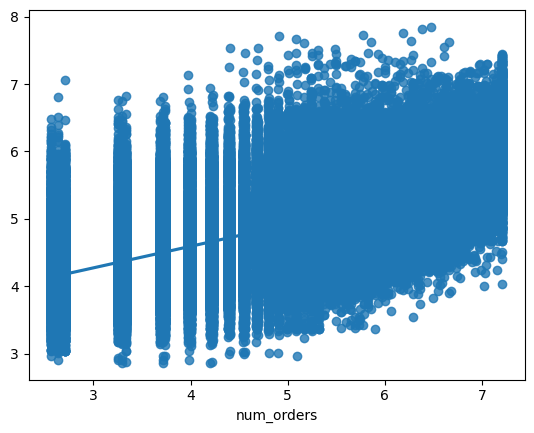

In [ ]:
lr = LinearRegression()
BuiltModel(lr)

# **Ridge Regression**

MAE : 0.809048403608917
RMSE : 0.9910816216498068
------------------------------
 Percentage of Training r2 Score : 31.70441839649004 %
Percentage of Testing r2 Score: 32.005615525506336 %
------------------------------

Cross validation score : 27.36789877938196

Accuracy Score - Cross Validation Score : 4.637716746124376


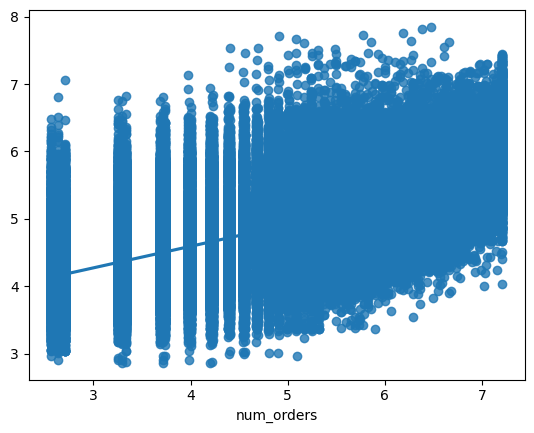

In [ ]:
from sklearn.linear_model import Ridge
rg = Ridge(alpha=1.0)
BuiltModel(rg)

# **Lasso Regression**

MAE : 0.9990354864673039
RMSE : 1.2019190889856401
------------------------------
 Percentage of Training r2 Score : 0.0 %
Percentage of Testing r2 Score: -0.0010745216705076999 %
------------------------------

Cross validation score : 27.461107841184035

Accuracy Score - Cross Validation Score : -27.46218236285454


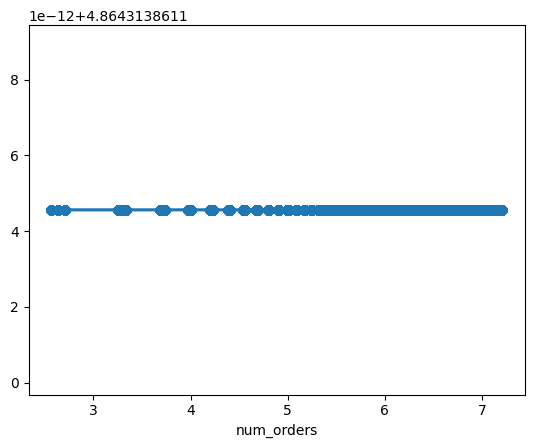

In [ ]:
from sklearn.linear_model import Lasso
la = Lasso(alpha=1.0)
BuiltModel(la)

# **DecisionTreeRegressor Model**

MAE : 0.4873512025327475
RMSE : 0.6632460786937233
------------------------------
 Percentage of Training r2 Score : 99.99996506170194 %
Percentage of Testing r2 Score: 69.54885809977756 %
------------------------------

Cross validation score : 45.55608863424638

Accuracy Score - Cross Validation Score : 23.992769465531183


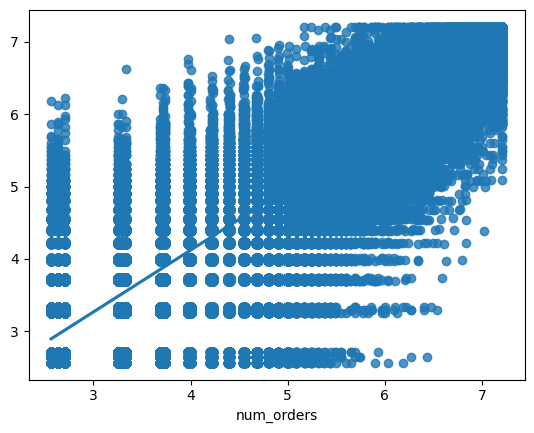

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
BuiltModel(dt)

# **RandomForestRegressor Model**

MAE : 0.36566431373231245
RMSE : 0.4857351232069818
------------------------------
 Percentage of Training r2 Score : 97.74237003039778 %
Percentage of Testing r2 Score: 83.66747929421429 %
------------------------------

Cross validation score : 64.60559856314508

Accuracy Score - Cross Validation Score : 19.06188073106921


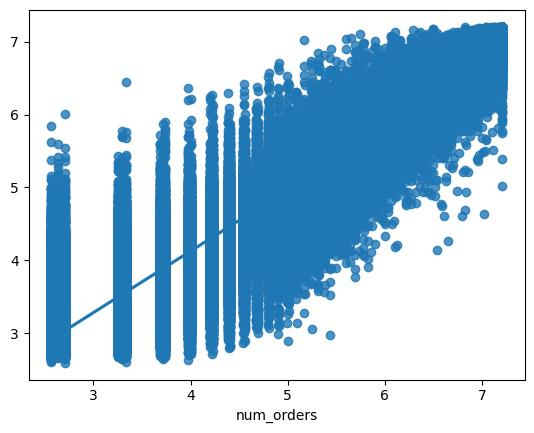

In [ ]:
#model with RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
BuiltModel(model)

# **Final Model**

In [ ]:
#lets train and test our final model with best parameters
#model = RandomForestRegressor(max_depth = 12, min_samples_split = 2, n_estimators = 700)
#model.fit(x_train,y_train)
#pred = model.predict(x_test)

#r2score = r2_score(y_test,pred)*100

#evaluation
#mse = mean_squared_error(y_test,pred)
#rmse = np.sqrt(mse)
#mae = mean_absolute_error(y_test,pred)
#print("MAE :", mae)
#print("RMSE :", rmse)
#print('------------------------------')

# r2 score

#print(f" \nr2 Score:", r2score,"%")

# **Making predictions for test dataset using final model**

In [ ]:
tdf1 = pd.merge(tt,meal, on=['meal_id'], how='inner')
dft = pd.merge(tdf1,full, on =['center_id'], how='inner')
dft.head(6)

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,category,cuisine,city_code,region_code,center_type,op_area
0,1028232,146,55,1885,158.11,159.11,0,0,Beverages,Thai,647,56,TYPE_C,2.0
1,1262649,147,55,1885,159.11,159.11,0,0,Beverages,Thai,647,56,TYPE_C,2.0
2,1453211,149,55,1885,157.14,158.14,0,0,Beverages,Thai,647,56,TYPE_C,2.0
3,1262599,150,55,1885,159.14,157.14,0,0,Beverages,Thai,647,56,TYPE_C,2.0
4,1495848,151,55,1885,160.11,159.11,0,0,Beverages,Thai,647,56,TYPE_C,2.0
5,1342607,152,55,1885,159.11,160.11,0,0,Beverages,Thai,647,56,TYPE_C,2.0


In [ ]:
p_ID = dft['id']
#dft = dft.drop(columns='id')

In [ ]:
dft.shape

(32573, 14)

In [ ]:
dft.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32573 entries, 0 to 32572
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     32573 non-null  int64  
 1   week                   32573 non-null  int64  
 2   center_id              32573 non-null  int64  
 3   meal_id                32573 non-null  int64  
 4   checkout_price         32573 non-null  float64
 5   base_price             32573 non-null  float64
 6   emailer_for_promotion  32573 non-null  int64  
 7   homepage_featured      32573 non-null  int64  
 8   category               32573 non-null  object 
 9   cuisine                32573 non-null  object 
 10  city_code              32573 non-null  int64  
 11  region_code            32573 non-null  int64  
 12  center_type            32573 non-null  object 
 13  op_area                32573 non-null  float64
dtypes: float64(3), int64(8), object(3)
memory usage: 3.7+ 

In [ ]:
dft.isnull().sum()

id                       0
week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
category                 0
cuisine                  0
city_code                0
region_code              0
center_type              0
op_area                  0
dtype: int64

In [ ]:
display(dft.drop_duplicates())

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,category,cuisine,city_code,region_code,center_type,op_area
0,1028232,146,55,1885,158.11,159.11,0,0,Beverages,Thai,647,56,TYPE_C,2.0
1,1262649,147,55,1885,159.11,159.11,0,0,Beverages,Thai,647,56,TYPE_C,2.0
2,1453211,149,55,1885,157.14,158.14,0,0,Beverages,Thai,647,56,TYPE_C,2.0
3,1262599,150,55,1885,159.14,157.14,0,0,Beverages,Thai,647,56,TYPE_C,2.0
4,1495848,151,55,1885,160.11,159.11,0,0,Beverages,Thai,647,56,TYPE_C,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32568,1412025,146,61,2104,583.03,581.03,0,0,Fish,Continental,473,77,TYPE_A,4.5
32569,1287019,147,61,2104,582.03,582.03,0,1,Fish,Continental,473,77,TYPE_A,4.5
32570,1396176,149,61,2104,629.53,629.53,0,0,Fish,Continental,473,77,TYPE_A,4.5
32571,1331977,150,61,2104,629.53,629.53,0,0,Fish,Continental,473,77,TYPE_A,4.5


In [ ]:

dft= pd.get_dummies(dft, columns=['emailer_for_promotion','homepage_featured'],drop_first=True)

In [ ]:
dft.skew()

id                         0.015811
week                       0.011814
center_id                  0.349886
meal_id                   -0.174424
checkout_price             0.607218
base_price                 0.664259
city_code                 -0.211339
region_code                0.054426
op_area                    0.638557
emailer_for_promotion_1    3.482025
homepage_featured_1        3.062862
dtype: float64

In [ ]:
#Lets treat the skewness
for index in dft.skew().index:
    if dft.skew().loc[index]>0.5:
        dft[index]=np.log1p(dft[index])
        if dft.skew().loc[index]<-0.5:
            dft[index]=np.square(dft[index])

In [ ]:
dft.skew()

id                         0.015811
week                       0.011814
center_id                  0.349886
meal_id                   -0.174424
checkout_price            -0.354586
base_price                -0.243574
city_code                 -0.211339
region_code                0.054426
op_area                    0.286345
emailer_for_promotion_1         inf
homepage_featured_1             inf
dtype: float64

In [ ]:
num_data2 = dft.select_dtypes(include = [np.number])
cat_data2 = dft.select_dtypes(exclude=[np.number])

In [ ]:
#Lets bring all numerical features to common scale by applying standard scaler
scaler = StandardScaler()
num2 = scaler.fit_transform(num_data2)
num2 = pd.DataFrame(num2,columns=num_data2.columns)

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
for i in cat_data2.columns:
    cat_data2[i] = enc.fit_transform(cat_data2[i].values.reshape(-1,1))

In [ ]:
T = pd.concat([num2, cat_data2], axis = 1)

In [ ]:
T.head(6)

,id,week,center_id,meal_id,checkout_price,base_price,city_code,region_code,op_area,emailer_for_promotion_1,homepage_featured_1,category,cuisine,center_type
0,-1.527818,-1.563469,-0.58546,-0.268769,-1.379605,-1.562795,0.689137,-0.040369,-2.053226,-0.266764,-0.297591,0.0,3.0,2.0
1,0.098318,-1.214310,-0.58546,-0.268769,-1.366516,-1.562795,0.689137,-0.040369,-2.053226,-0.266764,-0.297591,0.0,3.0,2.0
2,1.420235,-0.515993,-0.58546,-0.268769,-1.392380,-1.576249,0.689137,-0.040369,-2.053226,-0.266764,-0.297591,0.0,3.0,2.0
3,0.097971,-0.166835,-0.58546,-0.268769,-1.366125,-1.590206,0.689137,-0.040369,-2.053226,-0.266764,-0.297591,0.0,3.0,2.0
4,1.716005,0.182324,-0.58546,-0.268769,-1.353508,-1.562795,0.689137,-0.040369,-2.053226,-0.266764,-0.297591,0.0,3.0,2.0
5,0.652982,0.531482,-0.58546,-0.268769,-1.366516,-1.549009,0.689137,-0.040369,-2.053226,-0.266764,-0.297591,0.0,3.0,2.0


In [ ]:
T.shape

(32573, 14)

In [ ]:
X.shape

(456548, 14)

In [ ]:
T.columns

Index(['id', 'week', 'center_id', 'meal_id', 'checkout_price', 'base_price',
       'city_code', 'region_code', 'op_area', 'emailer_for_promotion_1',
       'homepage_featured_1', 'category', 'cuisine', 'center_type'],
      dtype='object')

In [ ]:
X.columns

Index(['id', 'week', 'center_id', 'meal_id', 'checkout_price', 'base_price',
       'city_code', 'region_code', 'op_area', 'emailer_for_promotion_1',
       'homepage_featured_1', 'category', 'cuisine', 'center_type'],
      dtype='object')

In [ ]:
#lets predict the price with our best model
prediction = model.predict(T)

In [ ]:
prediction

array([5.38600068, 5.40314951, 5.58383535, ..., 4.03624468, 3.2919673 ,
       4.03769479])

In [ ]:
#lets make the dataframe for prediction
Food_Demand = pd.DataFrame(prediction, columns=["num_orders"])

In [ ]:
sub_file = pd.concat([p_ID, Food_Demand], axis = 1)

In [ ]:
sub_file.head(3)

,id,num_orders
0,1028232,5.386001
1,1262649,5.403150
2,1453211,5.583835


In [ ]:
ss.head(3)

,id,num_orders
0,1028232,0
1,1127204,0
2,1212707,0


In [ ]:
#Lets save the submission to csv

sub_file.to_csv("Food Demand Forecasting.csv",index=False)



---



---



# **Thank You**



---



---

